<h2 style='height:40px;text-align:center;font-size:30px;background-color:red;border:20px;color:white'>Violent Crime Rates By US State<h2>


## Data Description
**Violent Crime Rates by US State:** This data set contains statistics, in arrests per 100,000 residents
for assault, murder, and rape in each of the 50 US states in 1973.
Also given is the percent of the population living in urban areas.This is a systematic approach for identifying and analyzing patterns and trends in crime using USArrest dataset.  

## What is Hierarchical Clustering?

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the **dendrogram**.

## Types Of Hierarchical Clustering:

There are two types of hierarchical clustering:

* **Agglomerative**: The data points are clustered using a bottom-up approach starting with individual data points.
* **Divisive**: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

![Hierarchical-Clustering-Analysis](https://miro.medium.com/max/1608/1*ICdqpcL62G1q_kIlVszrrg.png)

## Steps to Perform Hierarchical Clustering:

Following are the steps involved in **agglomerative clustering**:

* At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
* Form a cluster by joining the two closest data points resulting in K-1 clusters.
* Form more clusters by joining the two closest clusters resulting in K-2 clusters.
* Repeat the above three steps until one big cluster is formed.
* Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

## Import the Desired Libraries:

In [1]:
# ignoring any warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Reading and Understanding the Data

In [5]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/US_violent_crime.csv")

In [6]:
#peeking at the dataset
crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Our dataset consists of crime rates for Murder, Assault, UrbanPop and Rape

In [7]:
# Let's see how many rows and columns we got!
crime.shape

(50, 5)

In [8]:
#Let's see some facts here
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


**We have 50 rows and 5 columns.**

In [9]:
# Let's get some statistics summary
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Let's check for missing values.

In [10]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

**We have no missing values!**

In [11]:
# Renaming the column as Unnmaed doesn't make sense.
crime = crime.rename(columns={'Unnamed: 0':'State'})

In [12]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Exploratory Data Analysis

## 1) Murder Rate

<Axes: xlabel='State'>

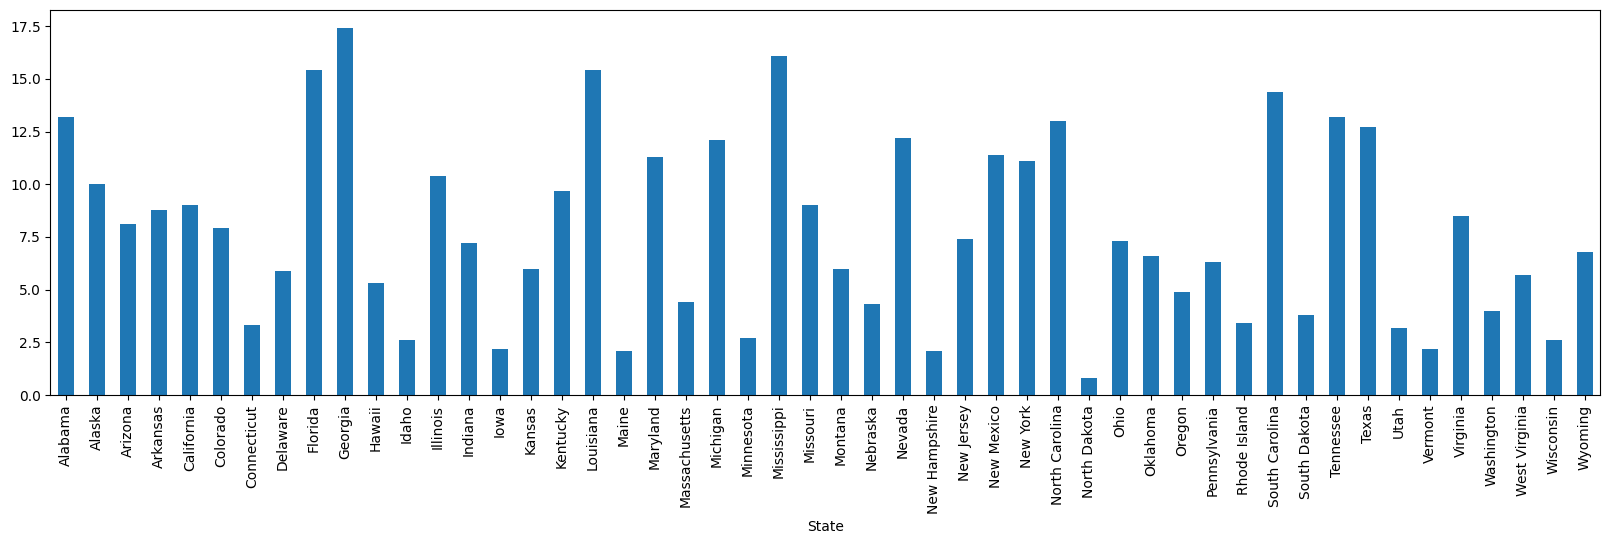

In [13]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Murder'].max().plot(kind='bar')

### **Observations**:

* Highest Murder Rate : Georgia and Missisippi
* Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.

## 2) Assault Rate

<Axes: xlabel='State'>

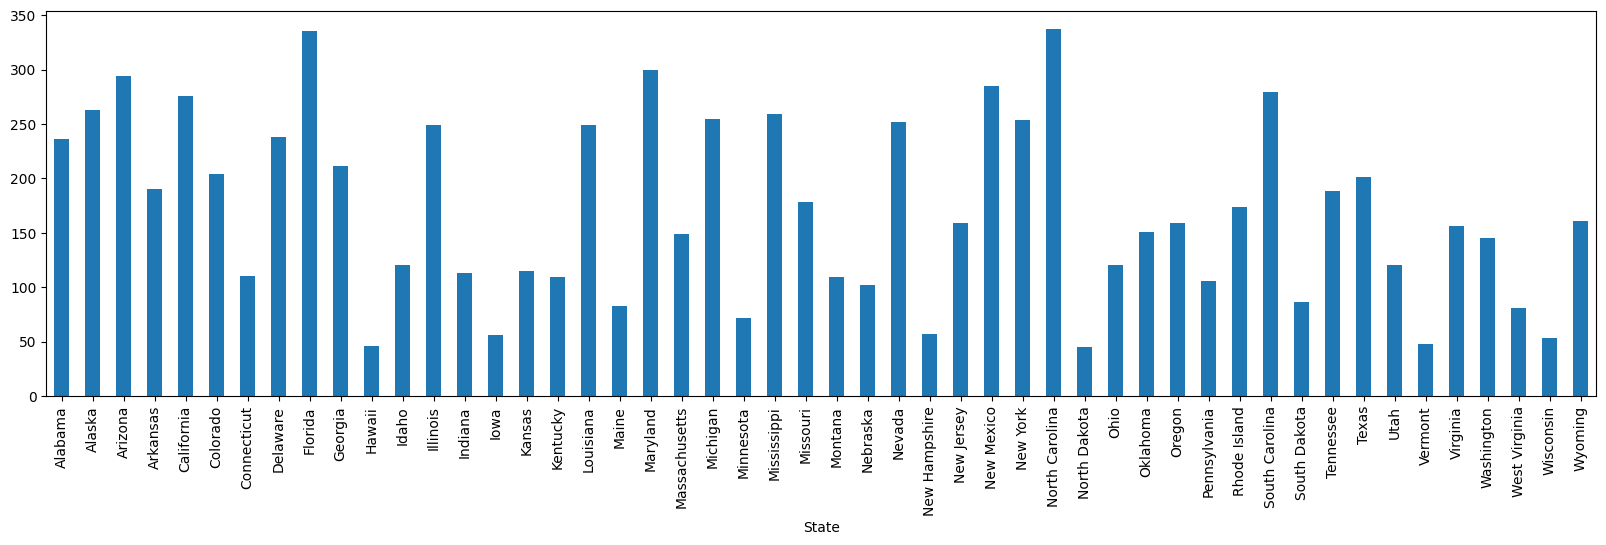

In [14]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Assault'].max().plot(kind='bar')

### **Observations**:

* Highest Assualt Rate : Florida and North California.
* Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.

## 3) Rape Rate

<Axes: xlabel='State'>

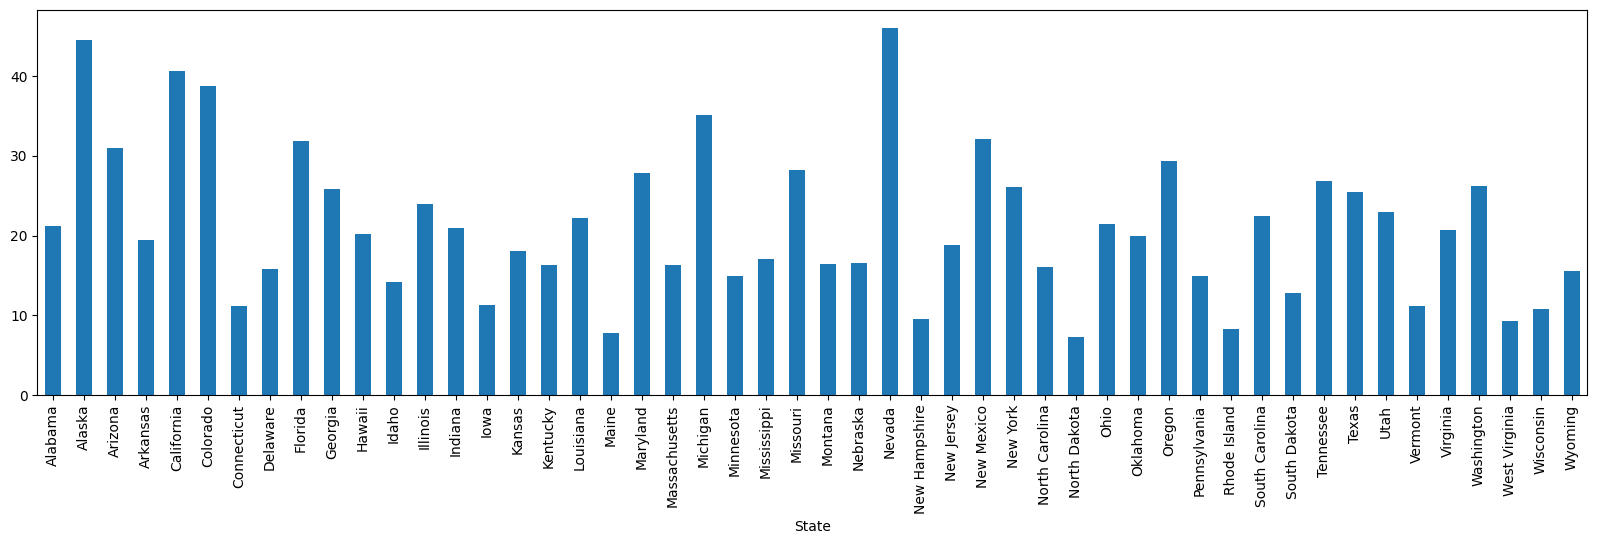

In [15]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Rape'].max().plot(kind='bar')

### Observations:

* Highest UrbanPop Rate : Nevada and Alaska.
* Lowest UrbanPop Rate  : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

## 4) UrbanPop : Percent Urban Population

<Axes: xlabel='State'>

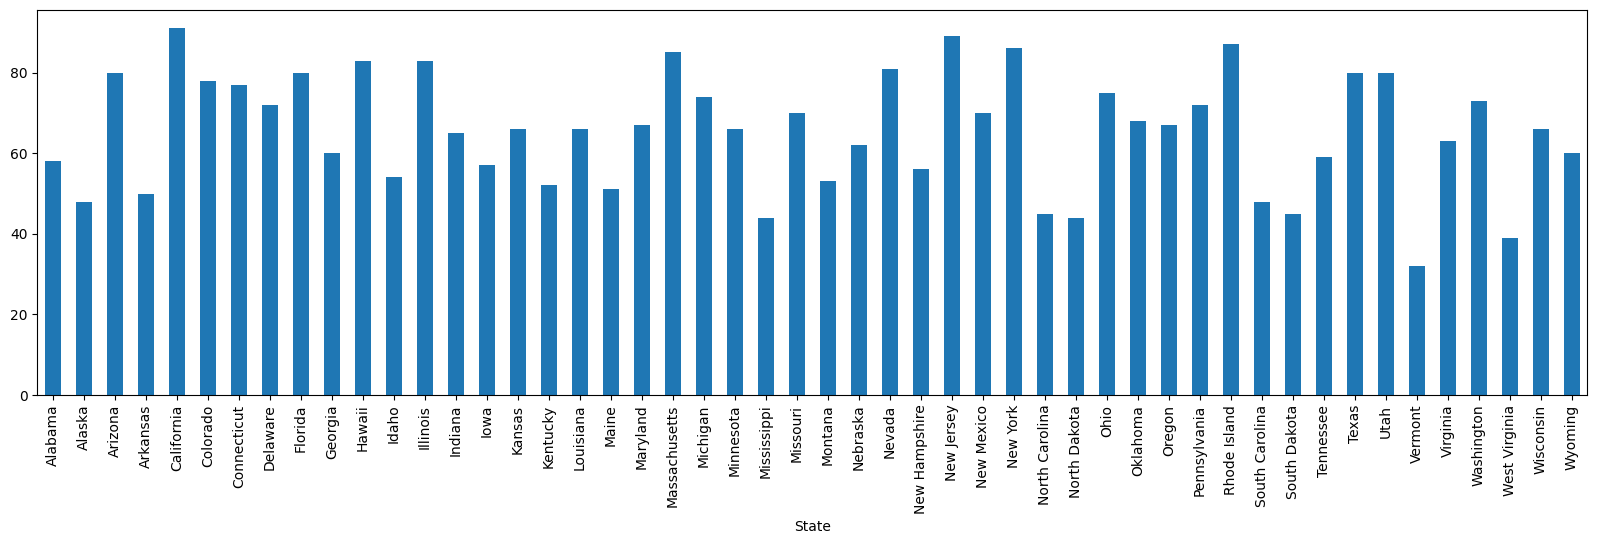

In [16]:
plt.figure(figsize=(20,5))
crime.groupby('State')['UrbanPop'].max().plot(kind='bar')

In [17]:
data = crime.iloc[:,1:].values

In [40]:
data

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [18]:
scaled_data = scaler.fit_transform(data)

In [35]:
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Types of Linkages:

## 1) Single Leakage:

The distance between 2 clusters is defined as the shortest distance between points in the two clusters

Text(0, 0.5, 'Euclidean distances')

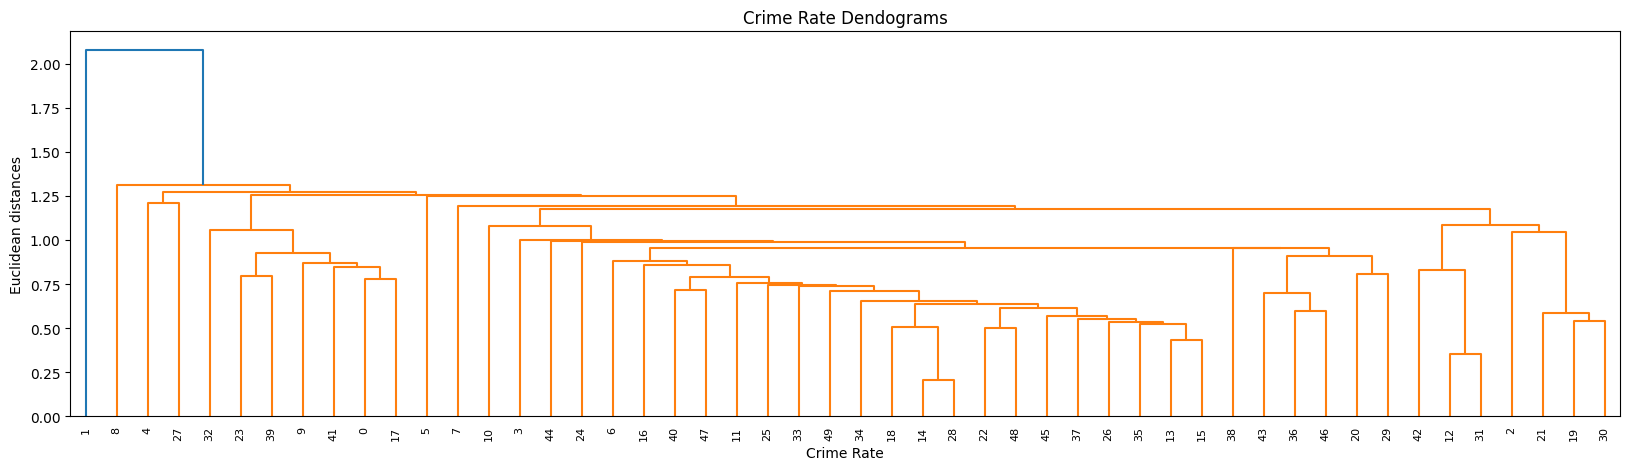

In [19]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

## 2) Complete Linkage:

The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

Text(0, 0.5, 'Euclidean distances')

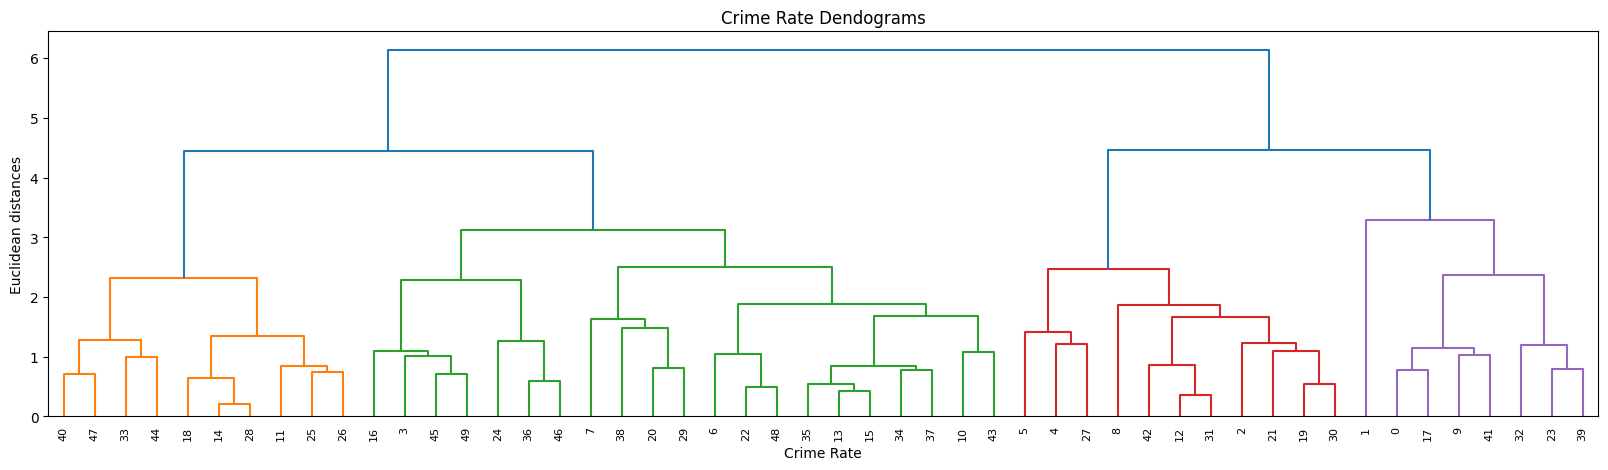

In [20]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

## 3) Average Linkage:
    
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Euclidean distances')

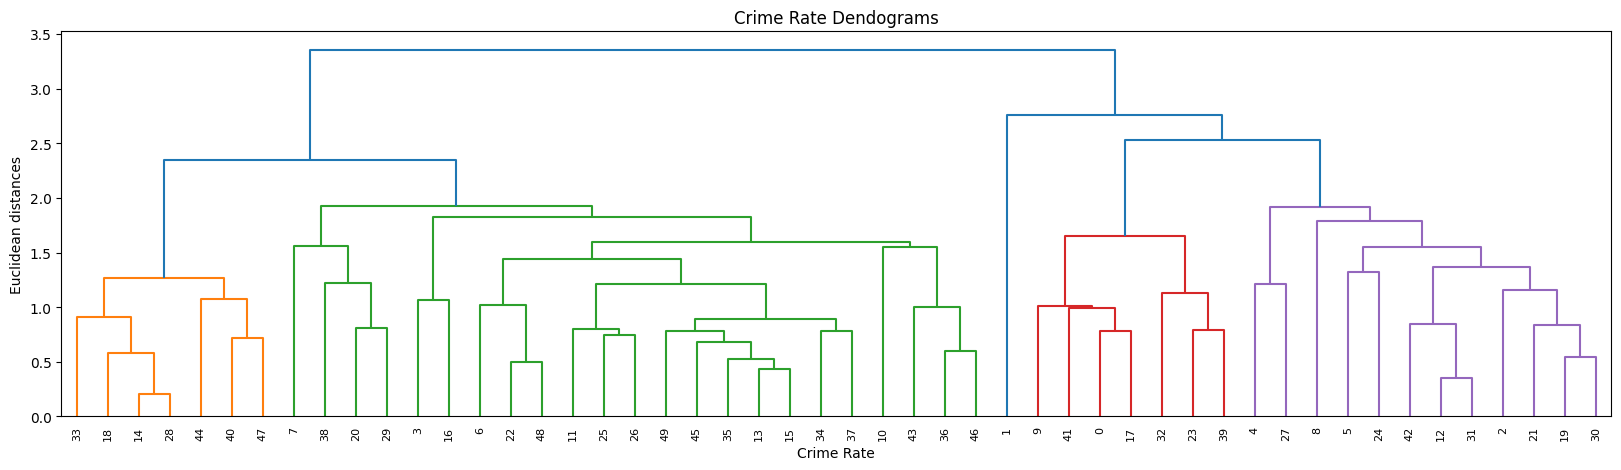

In [37]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

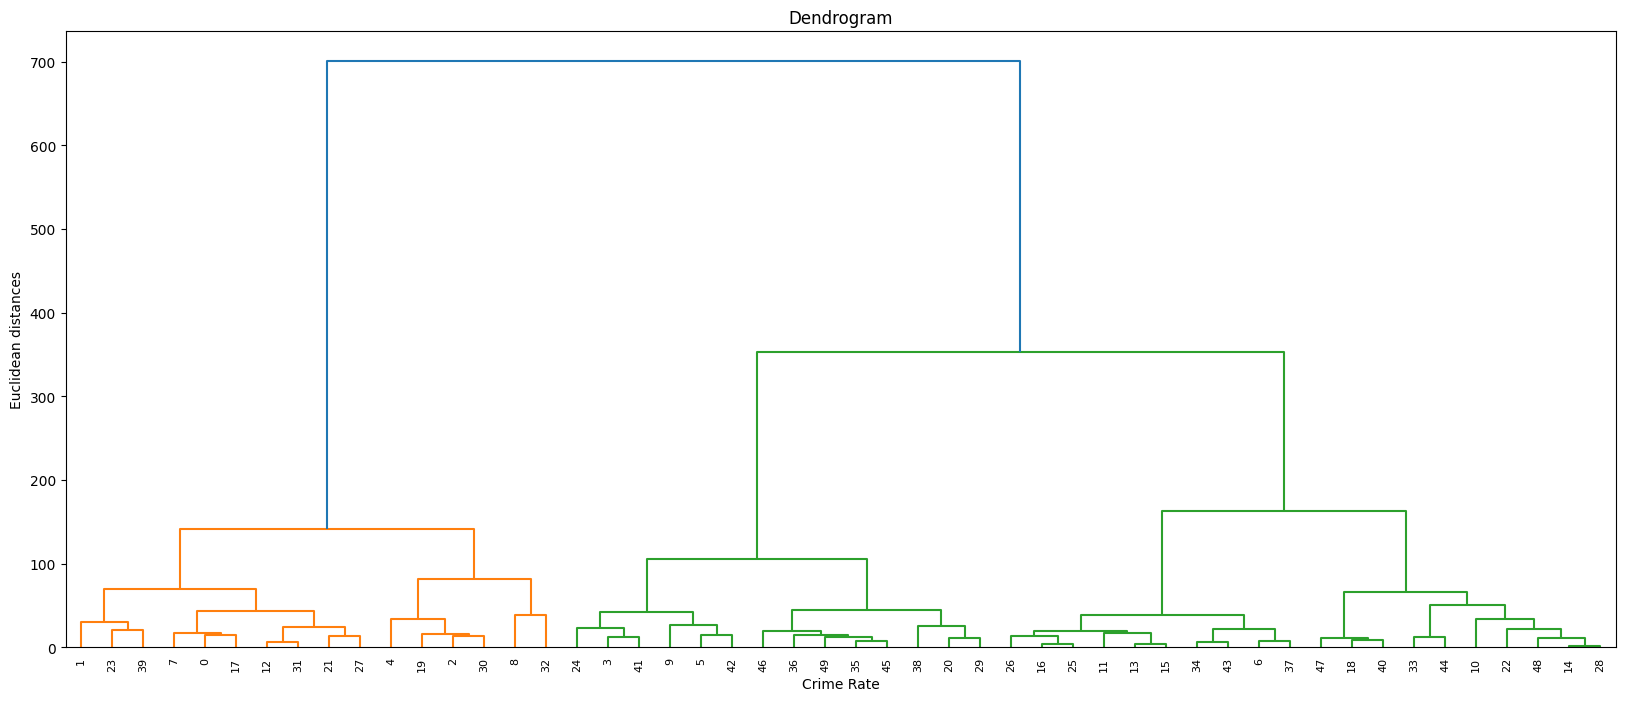

In [22]:
# With Ward method
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

## How do we determine the optimal number of clusters from this diagram?

We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let’s count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

In [23]:
# Fit the Agglomerative Clustering

AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

### **Ward** method
It is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [24]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [25]:
# Fetch the cluster labels
crime['cluster labels']= y_pred

In [38]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,cluster labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [26]:
# Let's see which State falls in which cluster
crime[['State','cluster labels']]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


<Axes: xlabel='cluster labels', ylabel='Murder'>

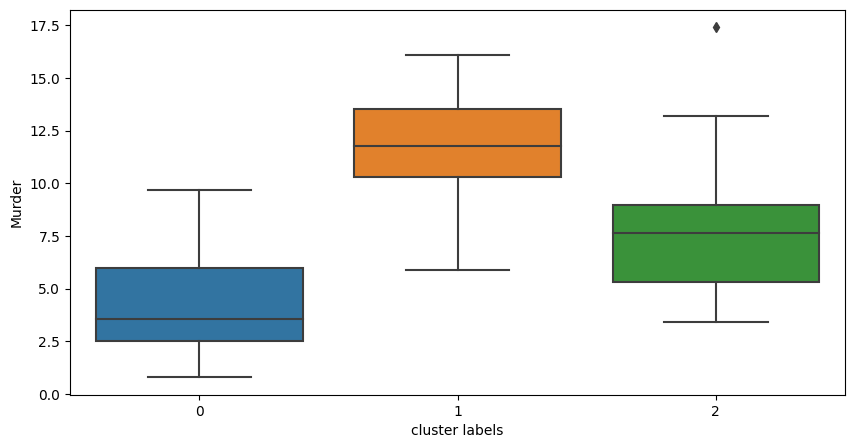

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=crime)

<Axes: xlabel='cluster labels', ylabel='Rape'>

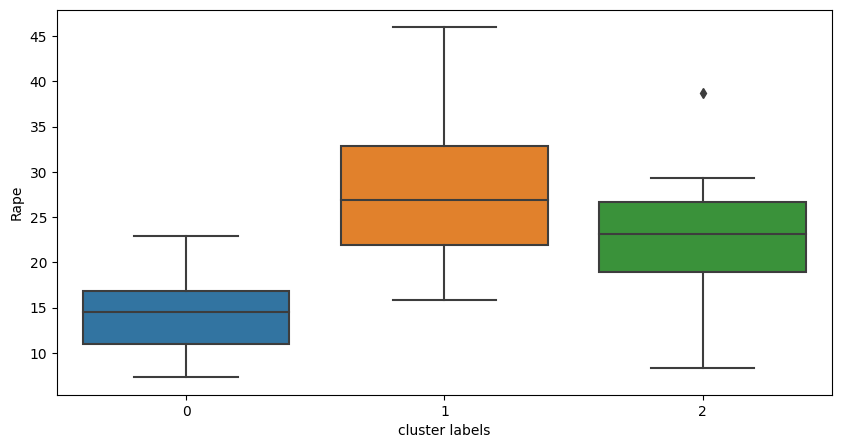

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=crime)

<Axes: xlabel='cluster labels', ylabel='Assault'>

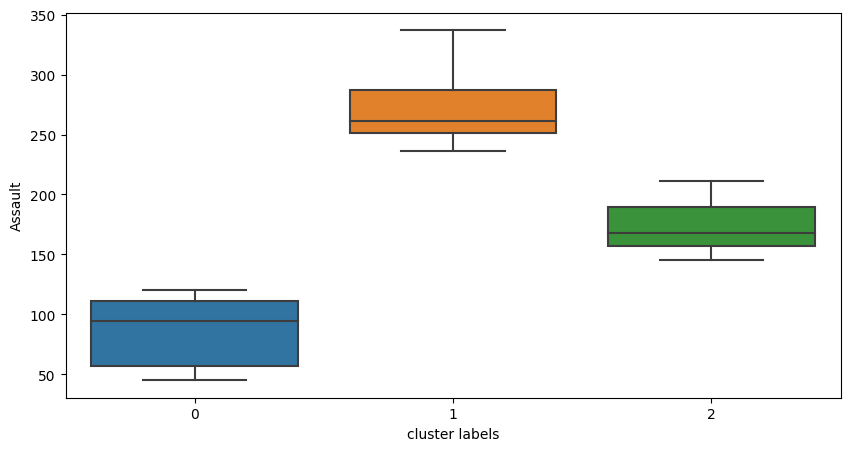

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=crime)

## **Observations**:

* The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
* The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
* The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone


Let's display the cities in each zone now!

In [30]:
Safe_Zone= crime.groupby('cluster labels')['State'].unique()[0]
Safe_Zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [31]:
Danger_Zone= crime.groupby('cluster labels')['State'].unique()[1]
Danger_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [32]:
Moderate_Zone= crime.groupby('cluster labels')['State'].unique()[2]
Moderate_Zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

## Creating a scatter plot based on the danger level clusters of the cities




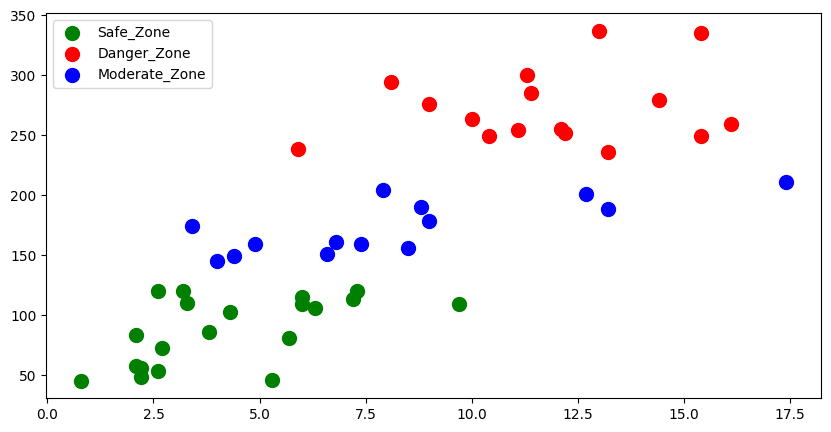

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='green', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='red', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='blue', label ='Moderate_Zone')
plt.legend()
plt.show()